# **Assignment 4 - MNIST classifier with various training knobs using numpy**

### Arpitha Gurumurthy

### **Data :** 
Kaggle dataset https://www.kaggle.com/c/digit-recognizer/data </br>
The files train.csv and test.csv contains gray-scale images of hand-drawn digits 0 through 9.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

* The train.csv has 785 columns. The first column called "label", is the hand drawn digit. The rest of the columns contain the pixel-values of the associated image.
* The test.csv is the same as the training set, except that it does not contain the "label" column.


## **Data Collection :** 
Here, we are  authorizing google drive to access and download the kaggle datasets and import it to the colab as shown below.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/My Drive/258_HW3/digit_recognizer_data

/content/gdrive/My Drive/258_HW3/digit_recognizer_data


In [ ]:
## Required only on the first run to get the datasets on to the drive
## !kaggle competitions download -c digit-recognizer
## !mkdir digit_recognizer_data 
## !mv *.zip digit_recognizer_data/
## %cd digit_recognizer_data/
## !unzip test.csv.zip
## !unzip train.csv.zip

In [5]:
## Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

##reading the csv into the dataframe 'train'
train = pd.read_csv("train.csv")

In [6]:
##Split the dataframe into train and test in the ratio 80 and 20 - train and test
##Set the random seed
np.random.seed(2)
random_seed = 2
X_train, X_test = train_test_split(train, test_size = 0.2, random_state=random_seed)

## **Exploratory Data Analysis**

In [7]:
##Check for the shape of train data
X_train.shape

(33600, 785)

In [8]:
##Understanding the training data
X_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21250,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20334,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29647,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3220,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5293,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
##Check for the shape of test data
X_test.shape

(8400, 785)

In [10]:
##Check for the shape of test data
X_test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38732,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3686,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30090,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31205,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,92,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11331,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
##Checking for null values in the training set
X_train.isna().sum().describe()

count    785.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [12]:
##Checking for null values in the test set
X_test.isna().sum().describe()

count    785.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

There are no null values in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


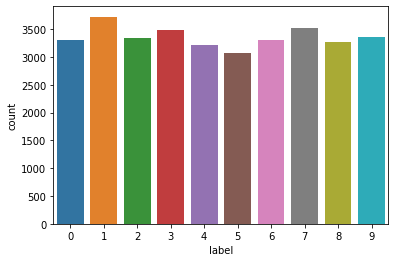

In [13]:
##Countplot to check the data distribtion
sns.countplot(X_train['label'])

From the above countplot, we can see that the dataset is mostly balanced

## **Feature Engineering**

In [14]:
##Converting the dataset to numpy array
train_np = X_train.to_numpy()
test_np = X_test.to_numpy()

In [15]:
test_np[:10]

array([[6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
test_np[test_np==255]
test_np.shape

(8400, 785)

The images of the MNIST dataset are greyscale and the pixel values range between 0 to 255. We will map these values into an interval from [0.01, 1] by multiplying each pixel by 0.99 / 255 and adding 0.01 to the result. This way, we avoid 0 values as inputs, which are capable of preventing weight updates.



In [17]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_np[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_np[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_np[:, :1])
test_labels = np.asfarray(test_np[:, :1])

We need the labels in a one-hot representation. We have 10 digits from 0 to 9, i.e. lr = np.arange(10).

In [18]:
lr = np.arange(10)
##Printing out the values
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label", label, "in one-hot representation: ", one_hot)

label 0 in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label 1 in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label 2 in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label 3 in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label 4 in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label 5 in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label 6 in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label 7 in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label 8 in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label 9 in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


We are ready now to turn our labelled images into one-hot representations. Instead of zeroes and one, we create 0.01 and 0.99.



In [19]:
image_size = 28 
no_of_different_labels = 10
lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels 
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

### Visualizations

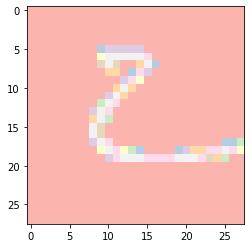

In [21]:
img = train_imgs[0].reshape((28,28))
plt.imshow(img, cmap="Pastel1")
plt.show()

In [22]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = train["label"]
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


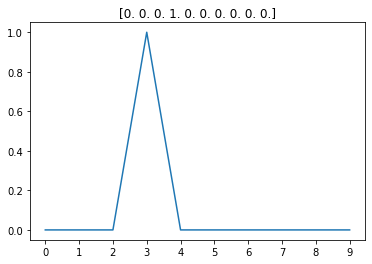

In [23]:
##Checking the output format
plt.title(Y_train[7])
plt.plot(Y_train[7])
plt.xticks(range(10));

## Defining the neural network for our classification

In [52]:
from scipy.stats import truncnorm

##Activation function
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
    # return np.maximum(0,x)

activation_function = sigmoid

##normalizing the input
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)

class NeuralNetwork:
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()

    ##Weight initialization       
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes))
        
    ##Neural net architecture defining
    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        output_vector1 = np.dot(self.wih, input_vector)
        output_hidden = activation_function(output_vector1)
        output_vector2 = np.dot(self.who, output_hidden)
        output_network = activation_function(output_vector2)
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_hidden.T)
        self.who += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        self.wih += self.learning_rate * np.dot(tmp, input_vector.T)
        
    def run(self, input_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih, input_vector)
        output_vector = activation_function(output_vector)
        output_vector = np.dot(self.who, output_vector)
        output_vector = activation_function(output_vector)
        return output_vector

    ##Functions for model evaluation     
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm    

    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [35]:
image_pixels = image_size * image_size
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                    no_of_out_nodes = 10, 
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)
    
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

In [36]:
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

[6.] 6 0.9926932344588864
[9.] 9 0.9913797185972738
[5.] 5 0.9445238972490092
[7.] 7 0.9851791952708082
[9.] 9 0.978272918756872
[2.] 2 0.9617343090986648
[3.] 3 0.5686407072766435
[3.] 8 0.3601824401597631
[7.] 7 0.9948749594063719
[0.] 0 0.9722486734678008
[6.] 6 0.9632144059847311
[9.] 9 0.9858178540215229
[1.] 1 0.7173582686688664
[8.] 8 0.7352715942113288
[2.] 2 0.8936194717906749
[4.] 4 0.928082021421061
[1.] 1 0.93383851017551
[9.] 9 0.7021827325357576
[4.] 4 0.9023338447346513
[1.] 1 0.5623171464649188


In [38]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))
print(80*"-")
print("Confusion matrix")
print(16*"-")
cm = ANN.confusion_matrix(train_imgs, train_labels)
print(cm)
print(80*"-")
print("Precision and recall scores")
print(25*"-")
for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cm), "recall: ", ANN.recall(i, cm))
print(80*"-")

accuracy train:  0.9448511904761905
accuracy: test 0.9372619047619047
--------------------------------------------------------------------------------
Confusion matrix
----------------
[[3275    1   51   26   11   28   44   16   34   21]
 [   0 3641    8    8    5    4    3   17   36    8]
 [   1    8 3109   39    9    3    7   38   19    2]
 [   4   23   32 3223    2   49    1   11   62   45]
 [   5    5   32    1 2993   18    6   15   12   44]
 [   4   13    8   91    5 2899   39    6   65   24]
 [  12    3   29    5   30   26 3196    3   24    0]
 [   0    9   31   25    8    2    0 3339    8   38]
 [   7   12   32   18    3    7    2    5 2907    7]
 [   3    7   16   51  150   30    0   78  103 3165]]
--------------------------------------------------------------------------------
Precision and recall scores
----------------
digit:  0 precision:  0.9891271519178496 recall:  0.9338465925292273
digit:  1 precision:  0.9782375067168189 recall:  0.9761394101876676
digit:  2 precision:

In [39]:
epochs = 3
neural_net = NeuralNetwork(no_of_in_nodes = image_pixels, 
                   no_of_out_nodes = 10, 
                   no_of_hidden_nodes = 100,
                   learning_rate = 0.1)

for epoch in range(epochs):  
    print("epoch: ", epoch)
    for i in range(len(train_imgs)):
        neural_net.train(train_imgs[i], 
                 train_labels_one_hot[i])
  
    corrects, wrongs = neural_net.evaluate(train_imgs, train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = neural_net.evaluate(test_imgs, test_labels)
    print("accuracy: test", corrects / ( corrects + wrongs))

epoch:  0
accuracy train:  0.94875
accuracy: test 0.9420238095238095
epoch:  1
accuracy train:  0.9650595238095238
accuracy: test 0.9529761904761904
epoch:  2
accuracy train:  0.9719047619047619
accuracy: test 0.9602380952380952


In [57]:
##With dropout
import random
# from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def sigmoid(x):
    return 1 / (1 + np.e ** -x)
    # return np.maximum(0,x)

activation_function = sigmoid


def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None
                ):  

        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes       
        self.no_of_hidden_nodes = no_of_hidden_nodes          
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        
        bias_node = 1 if self.bias else 0

        n = (self.no_of_in_nodes + bias_node) * self.no_of_hidden_nodes
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        self.wih = X.rvs(n).reshape((self.no_of_hidden_nodes, 
                                                   self.no_of_in_nodes + bias_node))

        n = (self.no_of_hidden_nodes + bias_node) * self.no_of_out_nodes
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        self.who = X.rvs(n).reshape((self.no_of_out_nodes, 
                                                    (self.no_of_hidden_nodes + bias_node)))

    def dropout_weight_matrices(self,
                                active_input_percentage=0.70,
                                active_hidden_percentage=0.70):
        # restore wih array, if it had been used for dropout
        self.wih_orig = self.wih.copy()
        self.no_of_in_nodes_orig = self.no_of_in_nodes
        self.no_of_hidden_nodes_orig = self.no_of_hidden_nodes
        self.who_orig = self.who.copy()
        

        active_input_nodes = int(self.no_of_in_nodes * active_input_percentage)
        active_input_indices = sorted(random.sample(range(0, self.no_of_in_nodes), 
                                      active_input_nodes))
        active_hidden_nodes = int(self.no_of_hidden_nodes * active_hidden_percentage)
        active_hidden_indices = sorted(random.sample(range(0, self.no_of_hidden_nodes), 
                                       active_hidden_nodes))
        
        self.wih = self.wih[:, active_input_indices][active_hidden_indices]       
        self.who = self.who[:, active_hidden_indices]
        
        self.no_of_hidden_nodes = active_hidden_nodes
        self.no_of_in_nodes = active_input_nodes
        return active_input_indices, active_hidden_indices
    
    def weight_matrices_reset(self, 
                              active_input_indices, 
                              active_hidden_indices): 
        temp = self.wih_orig.copy()[:,active_input_indices]
        temp[active_hidden_indices] = self.wih
        self.wih_orig[:, active_input_indices] = temp
        self.wih = self.wih_orig.copy()

        self.who_orig[:, active_hidden_indices] = self.who
        self.who = self.who_orig.copy()
        self.no_of_in_nodes = self.no_of_in_nodes_orig
        self.no_of_hidden_nodes = self.no_of_hidden_nodes_orig
 
           
    
    def train_single(self, input_vector, target_vector):
        if self.bias:
            # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )

        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        output_vector1 = np.dot(self.wih, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        
        output_vector2 = np.dot(self.who, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.who += tmp


        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:] 
        else:
            x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x         
        
    def train(self, data_array, 
              labels_one_hot_array,
              epochs=1,
              active_input_percentage=0.70,
              active_hidden_percentage=0.70,
              no_of_dropout_tests = 10):

        partition_length = int(len(data_array) / no_of_dropout_tests)
        
        for epoch in range(epochs):
            print("epoch: ", epoch)
            for start in range(0, len(data_array), partition_length):
                active_in_indices, active_hidden_indices = \
                           self.dropout_weight_matrices(active_input_percentage,
                                                        active_hidden_percentage)
                for i in range(start, start + partition_length):
                    self.train_single(data_array[i][active_in_indices], 
                                     labels_one_hot_array[i]) 
                    
                self.weight_matrices_reset(active_in_indices, active_hidden_indices)

    # def confusion_matrix(self, data_array, labels):
    #     cm = {}
    #     for i in range(len(data_array)):
    #         res = self.run(data_array[i])
    #         res_max = res.argmax()
    #         target = labels[i][0]
    #         if (target, res_max) in cm:
    #             cm[(target, res_max)] += 1
    #         else:
    #             cm[(target, res_max)] = 1
    #     return cm

    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm 

    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray   
        if self.bias:
            # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, input_vector)
        output_vector = activation_function(output_vector)  
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[self.bias]]) )
        output_vector = np.dot(self.who, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
     
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs


In [58]:
parts = 10
partition_length = int(len(train_imgs) / parts)
print(partition_length)

start = 0
for start in range(0, len(train_imgs), partition_length):
    print(start, start + partition_length)


3360
0 3360
3360 6720
6720 10080
10080 13440
13440 16800
16800 20160
20160 23520
23520 26880
26880 30240
30240 33600


In [59]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [60]:
epochs = 3

simple_network = NeuralNetwork(no_of_in_nodes = image_pixels, 
                               no_of_out_nodes = 10, 
                               no_of_hidden_nodes = 100,
                               learning_rate = 0.1)
    
    
 
simple_network.train(train_imgs, 
                     train_labels_one_hot, 
                     active_input_percentage=1,
                     active_hidden_percentage=1,
                     no_of_dropout_tests = 10,
                     epochs=epochs)

epoch:  0
epoch:  1
epoch:  2


In [61]:
corrects, wrongs = simple_network.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = simple_network.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))


accuracy train:  0.8744940476190476
accuracy: test 0.8622619047619048


In [64]:
print("Confusion matrix")
print(16*"-")
cm = simple_network.confusion_matrix(train_imgs, train_labels)
print(cm)
print(80*"-")
print("Precision and recall scores")
print(28*"-")
for i in range(10):
    print("digit: ", i, "precision: ", simple_network.precision(i, cm), "recall: ", simple_network.recall(i, cm))
print(80*"-")

Confusion matrix
----------------
[[3262    5  182   89   56  553  120   47   98   45]
 [   0 3561   15    2    8   15    2    5   20    2]
 [   0    5 2749   38    4    8    6   37    6    3]
 [   5   51  150 3084    5  126    1   81  112   24]
 [   7    1   40    0 2684   52    7   18   10   15]
 [   3   15    7   71    3 2023   12    7   34   10]
 [  14   12  103   25   39  119 3133    6   50    4]
 [   0    7   23   11    2    2    0 3020    2   13]
 [   8   30   46   75   16   89    7    4 2660   31]
 [  12   35   33   92  399   79   10  303  278 3207]]
--------------------------------------------------------------------------------
Precision and recall scores
----------------------------
digit:  0 precision:  0.985200845665962 recall:  0.7318824321292349
digit:  1 precision:  0.9567436861902203 recall:  0.9809917355371901
digit:  2 precision:  0.8210872162485066 recall:  0.9625350140056023
digit:  3 precision:  0.8844278749641525 recall:  0.8474855729596042
digit:  4 precision:  

We can see a decline in prediction accuracy after adding dropout. 

## References:
https://www.python-course.eu/neural_network_mnist.php </br>
https://www.kaggle.com/c/digit-recognizer/data </br>
https://www.python-course.eu/neural_networks_with_dropout.php